# Module 13: Calculus for Machine Learning

## Topics Covered
1. Functions and Limits
2. Derivatives and Differentiation Rules
3. Partial Derivatives
4. Gradient and Gradient Descent (Intuition)
5. Chain Rule
6. Integrals (Basic Concept)
7. Optimization Concepts
8. Applications in ML (Cost Functions, Backpropagation preview)

## Learning Objectives

By the end of this module, you will be able to:
- Understand fundamental calculus concepts for machine learning
- Compute derivatives and partial derivatives
- Understand gradient descent optimization
- Apply calculus concepts to cost functions
- Recognize how calculus powers machine learning algorithms

---

---
# Section 1: Functions and Limits
---

## What is a Function?

A function is a mathematical relationship that maps inputs to outputs. In machine learning:
- Models are functions that map features to predictions
- Loss functions measure how wrong our predictions are

### Why This Matters in Data Science

Understanding functions helps you build better models and understand how they work.

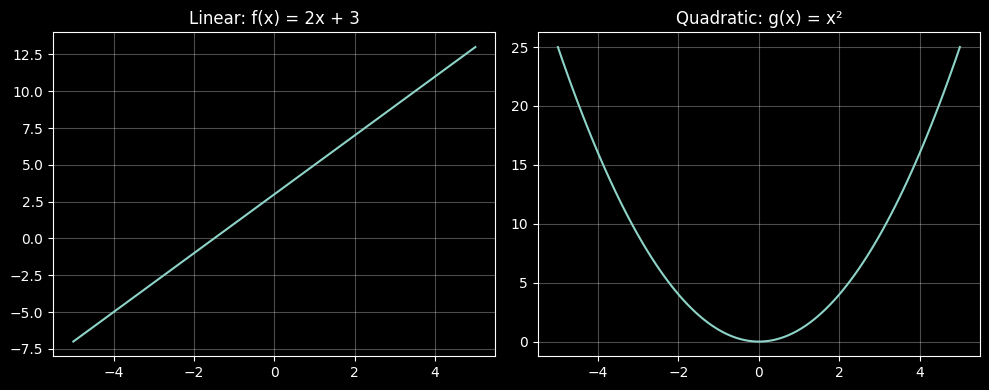

In [2]:
# Example: Defining and visualizing functions
import numpy as np
import matplotlib.pyplot as plt

# Linear function
def f(x):
    return 2*x + 3

# Quadratic function
def g(x):
    return x**2

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.title('Linear: f(x) = 2x + 3')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x, g(x))
plt.title('Quadratic: g(x) = x²')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# Section 2: Derivatives and Differentiation Rules
---

## What is a Derivative?

A derivative measures the **rate of change** of a function. It tells you:
- How much the output changes when you slightly change the input
- The slope of the function at any point

**Formula:** f'(x) = lim(h→0) [f(x+h) - f(x)] / h

### Why This Matters in Data Science

Derivatives are used to:
- Find the minimum of loss functions (training ML models)
- Determine which direction to adjust model parameters
- Understand model sensitivity to inputs

In [3]:
# Example: Computing derivatives numerically

def f(x):
    return x**2

def numerical_derivative(f, x, h=1e-5):
    """Compute derivative using finite differences"""
    return (f(x + h) - f(x)) / h

# Test at x = 3
x = 3
derivative = numerical_derivative(f, x)
print(f"Numerical derivative of x² at x={x}: {derivative:.4f}")
print(f"Analytical derivative (2x) at x={x}: {2*x}")
print("\nThey match! The derivative of x² is 2x")

Numerical derivative of x² at x=3: 6.0000
Analytical derivative (2x) at x=3: 6

They match! The derivative of x² is 2x


## Common Differentiation Rules

| Function | Derivative |
|----------|------------|
| f(x) = c (constant) | f'(x) = 0 |
| f(x) = x | f'(x) = 1 |
| f(x) = x² | f'(x) = 2x |
| f(x) = xⁿ | f'(x) = nxⁿ⁻¹ |
| f(x) = eˣ | f'(x) = eˣ |
| f(x) = ln(x) | f'(x) = 1/x |

---
# Section 3: Partial Derivatives
---

## What are Partial Derivatives?

When a function has multiple inputs, partial derivatives measure how the output changes with respect to **one input at a time**, holding others constant.

For f(x, y), we have:
- ∂f/∂x: derivative with respect to x (treating y as constant)
- ∂f/∂y: derivative with respect to y (treating x as constant)

### Why This Matters in Data Science

ML models have many parameters. Partial derivatives tell us how to adjust each parameter independently to minimize loss.

In [4]:
# Example: Partial derivatives

def f(x, y):
    """Function: f(x,y) = x² + 2xy + y²"""
    return x**2 + 2*x*y + y**2

def partial_x(x, y, h=1e-5):
    """Partial derivative with respect to x"""
    return (f(x + h, y) - f(x, y)) / h

def partial_y(x, y, h=1e-5):
    """Partial derivative with respect to y"""
    return (f(x, y + h) - f(x, y)) / h

x, y = 2, 3
print(f"At point ({x}, {y}):")
print(f"∂f/∂x = {partial_x(x, y):.4f}")
print(f"∂f/∂y = {partial_y(x, y):.4f}")
print("\nThese tell us how f changes if we move in x or y direction")

At point (2, 3):
∂f/∂x = 10.0000
∂f/∂y = 10.0000

These tell us how f changes if we move in x or y direction


---
# Section 4: Gradient and Gradient Descent
---

## What is a Gradient?

The **gradient** is a vector of all partial derivatives. It points in the direction of steepest increase.

For f(x, y): ∇f = [∂f/∂x, ∂f/∂y]

## Gradient Descent

Gradient descent is the workhorse algorithm for training ML models:
1. Start with random parameters
2. Compute the gradient (direction of steepest increase)
3. Move in the opposite direction (to decrease loss)
4. Repeat until convergence

**Update rule:** θ_new = θ_old - learning_rate × ∇Loss

### Why This Matters in Data Science

This is how neural networks, linear regression, and most ML algorithms learn from data!

Gradient descent optimization:
Started at x = 0
Converged to x = 2.9654
Minimum is at x = 3 (analytical solution)


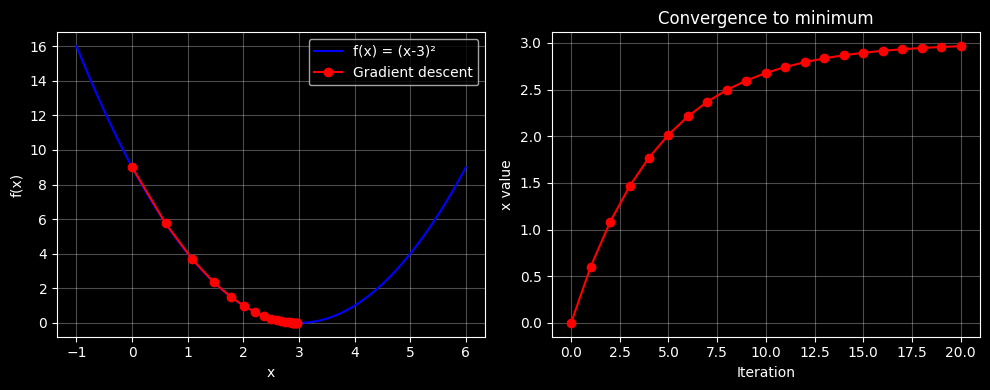

In [5]:
# Example: Gradient descent on a simple function

def f(x):
    """Loss function: f(x) = (x - 3)²"""
    return (x - 3)**2

def gradient(x):
    """Derivative: f'(x) = 2(x - 3)"""
    return 2 * (x - 3)

# Gradient descent
x = 0  # Starting point
learning_rate = 0.1
history = [x]

for i in range(20):
    grad = gradient(x)
    x = x - learning_rate * grad  # Update rule
    history.append(x)

print("Gradient descent optimization:")
print(f"Started at x = {history[0]}")
print(f"Converged to x = {history[-1]:.4f}")
print(f"Minimum is at x = 3 (analytical solution)")

# Plot convergence
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
x_vals = np.linspace(-1, 6, 100)
plt.plot(x_vals, f(x_vals), 'b-', label='f(x) = (x-3)²')
plt.plot(history, [f(x) for x in history], 'ro-', label='Gradient descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Convergence to minimum')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# Section 5: Chain Rule
---

## What is the Chain Rule?

The chain rule is used to compute derivatives of **composite functions** (functions inside functions).

**Rule:** If y = f(g(x)), then dy/dx = f'(g(x)) × g'(x)

### Why This Matters in Data Science

Neural networks are chains of functions. The chain rule (via backpropagation) allows us to train deep networks by computing gradients efficiently.

In [6]:
# Example: Chain rule

# Composite function: h(x) = (2x + 1)³
# Inner function: g(x) = 2x + 1
# Outer function: f(u) = u³

def h(x):
    return (2*x + 1)**3

def h_derivative(x):
    """Using chain rule: h'(x) = 3(2x+1)² × 2 = 6(2x+1)²"""
    return 6 * (2*x + 1)**2

x = 2
numerical = numerical_derivative(h, x)
analytical = h_derivative(x)

print(f"At x = {x}:")
print(f"Numerical derivative: {numerical:.4f}")
print(f"Analytical (chain rule): {analytical}")
print("\nChain rule gives exact answer!")

At x = 2:
Numerical derivative: 150.0006
Analytical (chain rule): 150

Chain rule gives exact answer!


---
# Section 6: Integrals (Basic Concept)
---

## What is an Integral?

An integral is the **opposite of a derivative**. While derivatives measure rate of change, integrals measure:
- Area under a curve
- Accumulation of quantities

### Why This Matters in Data Science

Integrals are used in:
- Probability (area under probability density functions)
- Expected values
- Some advanced optimization techniques

Integral of x² from 0 to 2: 2.6667
Analytical result (x³/3): 2.6667


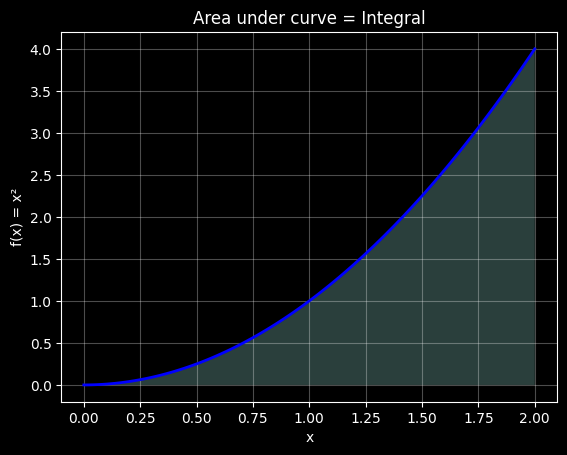

In [7]:
# Example: Numerical integration (area under curve)
from scipy import integrate

def f(x):
    return x**2

# Compute integral from 0 to 2
result, error = integrate.quad(f, 0, 2)
print(f"Integral of x² from 0 to 2: {result:.4f}")
print(f"Analytical result (x³/3): {(2**3)/3:.4f}")

# Visualize
x = np.linspace(0, 2, 100)
plt.fill_between(x, f(x), alpha=0.3)
plt.plot(x, f(x), 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x) = x²')
plt.title('Area under curve = Integral')
plt.grid(True, alpha=0.3)
plt.show()

---
# Section 7: Optimization Concepts
---

## Finding Minima and Maxima

To find minimum/maximum of a function:
1. Find where derivative = 0 (critical points)
2. Check second derivative:
   - f''(x) > 0: local minimum
   - f''(x) < 0: local maximum

### Why This Matters in Data Science

Training ML models = finding parameters that minimize loss function

Minimum found at x = 2.0000
Minimum value: 3.0000

Analytical solution: x = 2 (from derivative = 0)


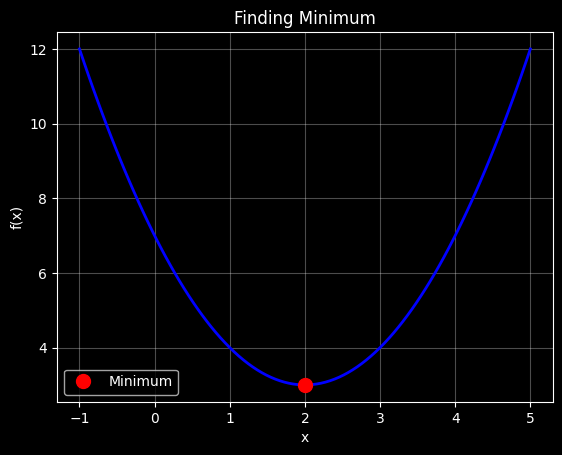

In [8]:
# Example: Finding minimum of a function
from scipy.optimize import minimize

def f(x):
    """Function: f(x) = x² - 4x + 7"""
    return x**2 - 4*x + 7

# Find minimum using optimization
result = minimize(f, x0=0)  # Start from x=0
print(f"Minimum found at x = {result.x[0]:.4f}")
print(f"Minimum value: {result.fun:.4f}")
print(f"\nAnalytical solution: x = 2 (from derivative = 0)")

# Visualize
x = np.linspace(-1, 5, 100)
plt.plot(x, f(x), 'b-', linewidth=2)
plt.plot(result.x[0], result.fun, 'ro', markersize=10, label='Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Finding Minimum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
# Section 8: Applications in Machine Learning
---

## Cost Functions and Optimization

In ML, we minimize **cost functions** (also called loss functions):
- Mean Squared Error: MSE = (1/n)Σ(y_true - y_pred)²
- We use calculus to find parameters that minimize MSE

Learned weight: 2.14
True weight: 2.0


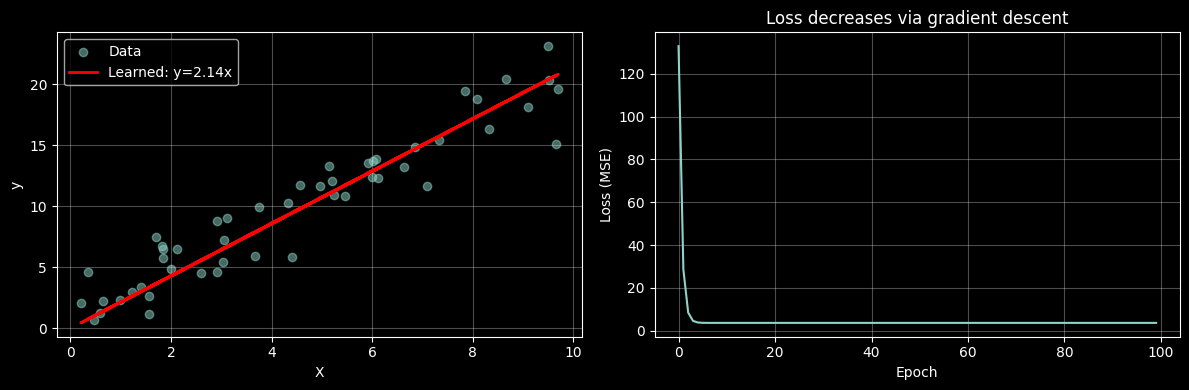

In [9]:
# Example: Simple linear regression using gradient descent

# Generate data: y = 2x + 1 + noise
np.random.seed(42)
X = np.random.rand(50) * 10
y = 2*X + 1 + np.random.randn(50) * 2

# Model: y_pred = w*x (learning w)
w = 0.0  # Initialize weight
learning_rate = 0.01
n = len(X)

# Training loop
losses = []
for epoch in range(100):
    # Forward pass
    y_pred = w * X
    
    # Compute loss (MSE)
    loss = np.mean((y - y_pred)**2)
    losses.append(loss)
    
    # Compute gradient
    gradient = -2 * np.mean((y - y_pred) * X)
    
    # Update weight
    w = w - learning_rate * gradient

print(f"Learned weight: {w:.2f}")
print(f"True weight: 2.0")

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, w*X, 'r-', linewidth=2, label=f'Learned: y={w:.2f}x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss decreases via gradient descent')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Practice Exercise

**Task:** Implement gradient descent to find the minimum of f(x) = x² + 4x + 7

1. Start from x = 0
2. Use learning rate = 0.1
3. Run for 50 iterations
4. Plot the convergence

Hint: The derivative is f'(x) = 2x + 4

In [ ]:
# Your code here


In [ ]:
# Solution

def f(x):
    return x**2 + 4*x + 7

def gradient(x):
    return 2*x + 4

x = 0
learning_rate = 0.1
history = [x]

for i in range(50):
    grad = gradient(x)
    x = x - learning_rate * grad
    history.append(x)

print(f"Minimum found at x = {history[-1]:.4f}")
print(f"Analytical solution: x = -2")

plt.plot(history, 'bo-')
plt.axhline(y=-2, color='r', linestyle='--', label='True minimum')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
# Module Summary

## Key Takeaways

- **Functions** model relationships between inputs and outputs in ML
- **Derivatives** measure rate of change and slope
- **Partial derivatives** handle functions with multiple variables
- **Gradient** is the vector of all partial derivatives
- **Gradient descent** is the core optimization algorithm for ML
- **Chain rule** enables backpropagation in neural networks
- **Optimization** finds the best parameters by minimizing loss functions

## Real-World Applications

1. Training neural networks (backpropagation)
2. Linear and logistic regression optimization
3. Finding optimal model parameters
4. Understanding model sensitivity
5. Implementing custom optimization algorithms

## Next Module

In the next module, we'll cover **Probability Theory**, which provides the mathematical foundation for understanding uncertainty and making predictions from data.

## Additional Practice

1. Implement gradient descent for 2D functions
2. Compute derivatives of sigmoid and ReLU activation functions
3. Visualize gradient descent on different loss landscapes
4. Apply chain rule to nested functions

---